In [4]:
import sparse_causal_model_learner_rl.learner as learner
from sparse_causal_model_learner_rl.learner import Learner, learner_gin_sacred
import vectorincrement
import os
from matplotlib import pyplot as plt

In [5]:
ve_config_path = os.path.join(os.path.dirname(vectorincrement.__file__), 'config', 've5.gin')
learner_config_path = os.path.join(os.path.dirname(learner.__file__), 'configs', 'test.gin')
run = learner_gin_sacred([ve_config_path, learner_config_path])

INFO - ve5_test - Running command 'run_train'
INFO - ve5_test - Started run with ID "23"
100%|██████████| 20/20 [00:00<00:00, 105.57it/s]
INFO - ve5_test - Result: <Learner env=<ObservationScaleWrapper<TimeLimit<VectorIncrementEnvironment<VectorIncrement-v0>>>> feature_shape=(10,) epochs=20>
INFO - ve5_test - Completed after 0:00:00


Make environment VectorIncrement-v0 None {}
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_cb547e43-7983-4e5b-b827-86c4ada2d511.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_185b85bc-129e-42cf-872f-3db493293a7a.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_996ea874-0d83-4752-bbd8-459f85c80dae.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_d1b6c435-5ffd-49de-a78c-d27849bef931.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_7ab789a2-6488-45dc-96e6-094f32c8a334.pkl.
Failed to detect content-type automatically for artifact /home/sergei/git/science/causality-disentanglement/debug/G_97ab59c7-8532-4af0-a31a-4bd2eed2ce0d.pkl.
Failed t

/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/jsonpickle/ext/numpy.py:292: UserWarning: ndarray is defined by reference to an object we do not know how to serialize. A deep copy is serialized instead, breaking memory aliasing.
  warnings.warn(msg)


In [6]:
learner = run.result
self = learner


In [7]:
import plotly
import plotly.graph_objs as go

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import animation

from tqdm.notebook import tqdm

from sklearn.decomposition import PCA
from IPython.display import HTML
from graphviz import Digraph


In [8]:
from causal_util.helpers import lstdct2dctlst
import seaborn as sns
import numpy as np

In [29]:
def visualize(self, exclude=['epochs'], nolog=['metrics/nnz']):
    # plotting
    results = self.history
    results = lstdct2dctlst(results)
    
    for k in exclude:
        del results[k]
        
    for k in list(results.keys()):
        if isinstance(results[k][0], list):
            del results[k]
        elif len(set(results[k])) <= 1:
            del results[k]
    
    total_plots = len(results) + 2
    plot_xy = int(np.ceil((total_plots) ** 0.5))
    plot_x, plot_y = plot_xy, plot_xy
    
    fig = plt.figure(figsize=(plot_x * 5, plot_y * 5))
    fig.patch.set_facecolor('xkcd:mint green')
    for i, (k_, v) in enumerate(results.items()):
        plt.subplot(plot_x, plot_y, i + 1)
        plt.xlabel('epoch')
        plt.title(k_)
        plt.plot(v)
        if k_ not in nolog:
            plt.yscale('log')
        else:
            plt.axhline(0)
            
    cm = sns.diverging_palette(0, 129, l=70, s=100, n=20, center="dark")
            
    Mf, Ma = [x.detach().numpy() for x in self.model.parameters()]
    plt.subplot(plot_x, plot_y, len(results) + 1)
    plt.title("Model for features")
    sns.heatmap(Mf, vmin=-1, vmax=1, cmap=cm)
    plt.xlabel('Old features')
    plt.ylabel('New features')
    
    plt.subplot(plot_x, plot_y, len(results) + 2)
    plt.title("Model for actions")
    sns.heatmap(Ma, vmin=-1, vmax=1, cmap=cm)
    plt.xlabel('Actions')
    plt.ylabel('New features')

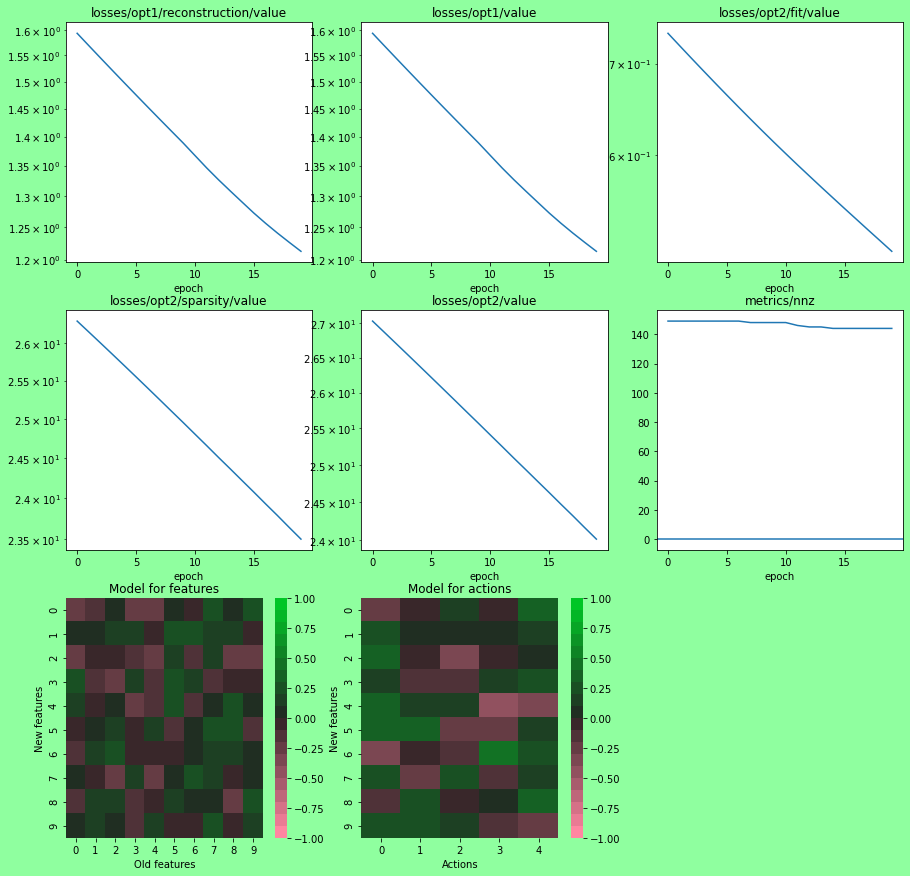

In [30]:
visualize(self)

In [21]:
def plot_models(self):
    cm = sns.diverging_palette(0, 129, l=70, s=100, n=20, center="dark")
    
    fig = plt.figure(figsize=(10, 5))
    fig.patch.set_facecolor('xkcd:mint green')
    Mf, Ma = [x.detach().numpy() for x in self.model.parameters()]
    plt.subplot(1, 2, 1)
    plt.title("Model for features")
    sns.heatmap(Mf, vmin=-1, vmax=1, cmap=cm)
    plt.xlabel('Old features')
    plt.ylabel('New features')
    
    plt.subplot(1, 2, 2)
    plt.title("Model for actions")
    sns.heatmap(Ma, vmin=-1, vmax=1, cmap=cm)
    plt.xlabel('Actions')
    plt.ylabel('New features')

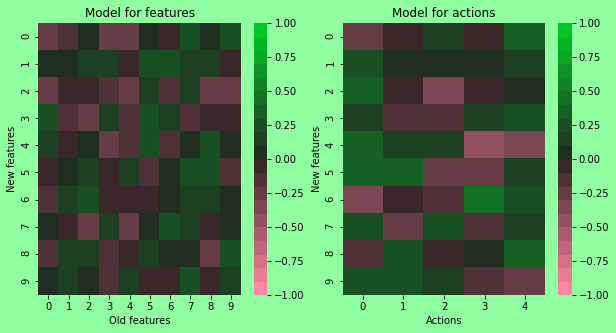

In [22]:
plot_models(self)

In [24]:
Mf, Ma = [x.detach().numpy() for x in self.model.parameters()]

In [25]:
Mf, Ma

(array([[-2.78917730e-01, -1.05742618e-01,  2.20445171e-02,
         -2.91803181e-01, -2.07025915e-01,  9.69497263e-02,
         -2.04776656e-02,  2.09645718e-01,  2.92162504e-02,
          2.73398846e-01],
        [ 8.04049894e-02,  7.84391090e-02,  1.95150927e-01,
          1.16422638e-01, -7.95066953e-02,  2.01575831e-01,
          2.72221297e-01,  1.09342366e-01,  1.67269081e-01,
         -1.27393026e-02],
        [-2.94793874e-01, -1.20539255e-02, -3.30579467e-02,
         -1.52793124e-01, -2.01974705e-01,  1.75347671e-01,
         -1.17729366e-01,  1.28691107e-01, -2.07309514e-01,
         -2.64535904e-01],
        [ 2.48802572e-01, -1.91228941e-01, -2.69409150e-01,
          1.30448177e-01, -1.14237547e-01,  2.55909711e-01,
          1.73460394e-01, -1.81007132e-01, -4.62297089e-02,
         -7.57439435e-03],
        [ 1.79811448e-01, -3.59558128e-02,  8.53013396e-02,
         -2.18413100e-01, -1.38463035e-01,  2.04148635e-01,
         -1.67717218e-01,  1.73048303e-02,  2.158908

In [32]:
def graph_for_matrices(self, threshold=0.2):
    """Visualize matrices as a graph."""
    Mf, Ma = [x.detach().numpy() for x in self.model.parameters()]
    # dimension
    actions = Ma.shape[1]
    features = Mf.shape[1]

    ps = Digraph(name='Causal model', engine='neato')#,
                 #node_attr={'shape': 'plaintext'})

    # adding features nodes
    for f in range(features):
        ps.node('f%02d' % f, color='green')
        ps.node("f'%02d" % f, color='blue')

    # adding action edges
    for a in range(actions):
        ps.node('a%02d' % a, color='red')

    # adding edges
    edges = 0

    for f1, a in zip(*np.where(np.abs(Ma) > threshold)):
        ps.edge('a%02d' % a, "f'%02d" % f1)
        edges += 1

    for f1, f in zip(*np.where(np.abs(Mf) > threshold)):
        ps.edge('f%02d' % f, "f'%02d" % f1)
        edges += 1
    
    max_edges = features ** 2 + actions * features
    percent = int(100 - 100. * edges / max_edges)
    print("Number of edges: %d out of %d, sparsity %.2f%%" % \
          (edges, max_edges, percent))
    
    
    f_out = f"CausalModel_Edges{edges}_outof{max_edges}_Sparsity{percent}perc"
    ps.render(filename=f_out, format='png')

    return ps, f_out

Number of edges: 50 out of 150, sparsity 66.00%


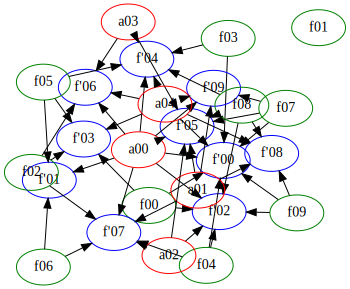

In [33]:
ps, f_out = graph_for_matrices(self)
ps

In [31]:
self.history

[{'epochs': 0,
  'n_samples': 1020,
  'losses/opt1/reconstruction/coeff': 1.0,
  'losses/opt1/reconstruction/value': 1.5935859680175781,
  'losses/opt1/value': 1.5935859680175781,
  'losses/opt2/fit/coeff': 1.0,
  'losses/opt2/fit/value': 0.7365337610244751,
  'losses/opt2/sparsity/coeff': 1.0,
  'losses/opt2/sparsity/value': 26.294757843017578,
  'losses/opt2/value': 27.031291961669922,
  'metrics/nnz': 149,
  'weights/model': [array([[-2.78917730e-01, -1.05742618e-01,  2.20445171e-02,
           -2.91803181e-01, -2.07025915e-01,  9.69497263e-02,
           -2.04776656e-02,  2.09645718e-01,  2.92162504e-02,
            2.73398846e-01],
          [ 8.04049894e-02,  7.84391090e-02,  1.95150927e-01,
            1.16422638e-01, -7.95066953e-02,  2.01575831e-01,
            2.72221297e-01,  1.09342366e-01,  1.67269081e-01,
           -1.27393026e-02],
          [-2.94793874e-01, -1.20539255e-02, -3.30579467e-02,
           -1.52793124e-01, -2.01974705e-01,  1.75347671e-01,
           -1.17